# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [5]:
# Load .env enviroment variables
#.env file is created with Alpaca api key and Aplaca secret key
# make sure that when git commit is done, .env file is excluded

load_dotenv()

#print(os.getenv("alpaca_api_key"))
#print(os.getenv("alpaca_secret_key"))

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [6]:
# Set current amount of crypto assets
#as per isntructions, the number of bitcoin and ethereum are 1.2 and 5.3, so assign those values to the variables

my_btc=1.2
my_eth=5.3

In [7]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

print(btc_url)

https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD


In [34]:
# Fetch current BTC price

# As per instructions the response format must be the JSON
#https://api.alternative.me/v2/ticker/bitcoin/?convert=cad?format=json
btc_url+="?format=json"
btc_response_json = requests.get(btc_url)
#print(btc_response_json.text)
#print(btc_response_json.status_code)
#print(btc_response_json.json())

my_btc_value=0
if btc_response_json.status_code != 200:
    print("There is issue in calling the API for bitcoin price")
    #handle the error
else:
    #now from btc_response_json.json(), get the price from the dictionary
    #{'data': {'1': {'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'website_slug': 'bitcoin', 'rank': 1, 'circulating_supply': 18666156, 'total_supply': 18666156, 'max_supply': 21000000, 'quotes': {'USD': {'price': 55868.0,
    jsonResponse=btc_response_json.json()
    #print(jsonResponse)
    #print(jsonResponse['data']['1']['quotes']['USD']['price'])
    current_btc_price = float(jsonResponse['data']['1']['quotes']['USD']['price'])
    my_btc_value = my_btc*current_btc_price
    #print(my_btc_value)
  

my_eth_value=0

# Fetch current ETH price
eth_url+="?format=json"
#print(eth_url)
eth_response_json = requests.get(eth_url)
#print(eth_response_json.status_code)
#print(eth_response_json.json())
my_eth_value=0

if eth_response_json.status_code != 200:
    print("There is issue in calling the API for getting ETH price")
    #handle the error
else:
    #now read the data from the response
    #{'data': {'1027': {'id': 1027, 'name': 'Ethereum', 'symbol': 'ETH', 'website_slug': 'ethereum',
    #'rank': 2, 'circulating_supply': 115226701, 'total_supply': 115226701, 'max_supply': 0, 'quotes': {'USD': {'price': 1719.72
    jsonResponse=eth_response_json.json()
    #print(jsonResponse)
    #print(jsonResponse['data']['1027']['quotes']['USD']['price'])
    current_eth_price = float(jsonResponse['data']['1027']['quotes']['USD']['price'])
    my_eth_value = my_eth*current_eth_price


# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $66816.00
The current value of your 5.3 ETH is $9091.41


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [35]:
# Current amount of shares
# as per instructions the number of shares for AGG and SPY are 200 and 50
my_agg=200
my_spy=50

In [37]:
# Set Alpaca API key and secret
api_key = os.getenv("alpaca_api_key")
secret_key = os.getenv("alpaca_secret_key")

# Create the Alpaca API object
alpac_api = tradeapi.REST(
    api_key,
    secret_key,
    api_version="v2"
)
print(alpac_api)

In [52]:
# Format current date as ISO format
current_date = pd.to_datetime("today").isoformat()
print(current_date)


# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API

timeframe = "1D"

# Get current closing prices for SPY and AGG
df_stock_protfolio = alpac_api.get_barset(
    tickers,
    timeframe,
    start = current_date,
    end = current_date
).df

#get the latest date closing price, so sort it descending and read the close value of index 0
df_stock_protfolio = df_stock_protfolio.sort_index(ascending=False)

# Preview DataFrame
df_stock_protfolio.head()

2021-03-27T17:47:54.498080


AGG                                       \
                             open     high       low    close   volume   
time                                                                     
2021-03-26 00:00:00-04:00  113.91  114.075  113.8600  113.930  3385851   
2021-03-25 00:00:00-04:00  114.24  114.290  113.9900  114.095  5051494   
2021-03-24 00:00:00-04:00  113.90  114.200  113.8600  114.170  4330295   
2021-03-23 00:00:00-04:00  113.89  114.040  113.7700  114.040  5026028   
2021-03-22 00:00:00-04:00  113.70  113.800  113.6022  113.750  5321817   

                              SPY                                    
                             open    high     low   close    volume  
time                                                                 
2021-03-26 00:00:00-04:00  390.93  396.41  390.29  395.97  91121640  
2021-03-25 00:00:00-04:00  385.98  390.55  383.90  389.64  99874063  
2021-03-24 00:00:00-04:00  391.00  392.75  387.49  387.55  84412500  
2021-03-23 00:00:00-04:00  391.91  393.46  388.66  389.59  78235945  
2021-03-22 00:00:00-04:00  390.03  394.07  389.97  392.54  61372559

In [59]:
# Pick AGG and SPY close prices
agg_close_price = float(df_stock_protfolio["AGG"]["close"][0].item())
spy_close_price = float(df_stock_protfolio["SPY"]["close"][0].item())

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $113.93
Current SPY closing price: $395.97


In [60]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19798.50
The current value of your 200 AGG shares is $22786.00


### Savings Health Analysis

In [64]:
# Set monthly household income
monthly_income=12000

# Create savings DataFrame

#create a dataframe from dictionary with key as "amount" with a list as value. The list will have the values for crypto and shares
df_total_portfolio = {"amount":[my_btc_value+my_eth_value,my_spy_value+my_agg_value]}
#print(df_total_portfolio)
df_savings = pd.DataFrame(df_total_portfolio,index=['Crypto','Shares'])
#df_savings.head()
# Display savings DataFrame
display(df_savings)

,amount
Crypto,75907.408
Shares,42584.500


array([<AxesSubplot:ylabel='amount'>], dtype=object)

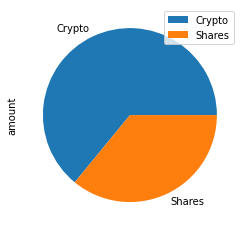

In [65]:
# Plot savings pie chart
df_savings.plot(kind='pie', subplots=True)

In [69]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
#get everything from the dataframe df_savings

savings = df_savings.sum().item()
#print(savings)

# Validate saving health
if savings > emergency_fund:
    print("Congratulations, you have more than 3x your monthly income in your emergency fund.")
elif savings == emergency_fund:
    print("Congratulations, you have reached the goal of 3x your monthly income in your emergency fund.")
else:
    print(f'You are missing ${emergency_fund - savings} from reaching your goal of 3x your monthly income in your emergency fund.')

Congratulations, you have more than 3x your monthly income in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [74]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [84]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpac_api.get_barset(
    tickers,
    "day",
    start = start_date,
    end = end_date
).df

#sort by index
df_stock_data = df_stock_data.sort_index()

# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high       low   close    volume   
time                                                                      
2020-03-18 00:00:00-04:00  109.36  110.5700  105.7707  106.33  30173684   
2020-03-19 00:00:00-04:00  106.47  109.2200  105.5600  108.97  21031320   
2020-03-20 00:00:00-04:00  108.46  110.2399  108.4600  109.49  28449412   
2020-03-23 00:00:00-04:00  109.90  112.9400  109.0000  112.55  23873510   
2020-03-24 00:00:00-04:00  111.52  113.5000  111.0754  113.29  18141498   

                              SPY                                       
                             open      high     low   close     volume  
time                                                                    
2020-03-18 00:00:00-04:00  236.25  248.3700  228.02  241.01  256921808  
2020-03-19 00:00:00-04:00  239.25  247.3800  232.22  241.18  248430643  
2020-03-20 00:00:00-04:00  242.53  244.4700  228.50  228.94  286308782  
2020-03-23 00:00:00-04:00  228.19  229.6833  218.26  222.51  268298876  
2020-03-24 00:00:00-04:00  234.42  244.1000  233.80  243.59  203576470

In [85]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],   #AGG has 40% weightage and SPY has 60% weightage
    num_simulation = 500,
    num_trading_days = 252*30  #252 is the total number of trading days in one year
)

In [86]:
# Printing the simulation input data
MC_thirty_year.portfolio_data.head()

AGG                                        \
                             open      high       low   close    volume   
time                                                                      
2020-03-18 00:00:00-04:00  109.36  110.5700  105.7707  106.33  30173684   
2020-03-19 00:00:00-04:00  106.47  109.2200  105.5600  108.97  21031320   
2020-03-20 00:00:00-04:00  108.46  110.2399  108.4600  109.49  28449412   
2020-03-23 00:00:00-04:00  109.90  112.9400  109.0000  112.55  23873510   
2020-03-24 00:00:00-04:00  111.52  113.5000  111.0754  113.29  18141498   

                                           SPY                            \
                          daily_return    open      high     low   close   
time                                                                       
2020-03-18 00:00:00-04:00          NaN  236.25  248.3700  228.02  241.01   
2020-03-19 00:00:00-04:00     0.024828  239.25  247.3800  232.22  241.18   
2020-03-20 00:00:00-04:00     0.004772  242.53  244.4700  228.50  228.94   
2020-03-23 00:00:00-04:00     0.027948  228.19  229.6833  218.26  222.51   
2020-03-24 00:00:00-04:00     0.006575  234.42  244.1000  233.80  243.59   

                                                   
                              volume daily_return  
time                                               
2020-03-18 00:00:00-04:00  256921808          NaN  
2020-03-19 00:00:00-04:00  248430643     0.000705  
2020-03-20 00:00:00-04:00  286308782    -0.050750  
2020-03-23 00:00:00-04:00  268298876    -0.028086  
2020-03-24 00:00:00-04:00  203576470     0.094737

In [87]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
1,1.007683e+00,9.951802e-01,1.027355e+00,1.016407e+00,1.034809e+00,1.001672e+00,1.017720e+00,1.007308e+00,1.002043e+00,1.000634e+00,...,1.015278e+00,1.004058e+00,1.021525e+00,9.965241e-01,9.980205e-01,9.925061e-01,1.015432e+00,9.995547e-01,1.008935e+00,9.887239e-01
2,9.910712e-01,1.005691e+00,1.021294e+00,9.994713e-01,1.038969e+00,1.004974e+00,9.988991e-01,1.022993e+00,9.896931e-01,1.001606e+00,...,1.006810e+00,9.907512e-01,1.015105e+00,9.986250e-01,9.989072e-01,9.892597e-01,1.035988e+00,1.004821e+00,1.016828e+00,9.980511e-01
3,9.988141e-01,1.035242e+00,1.026304e+00,9.930674e-01,1.043292e+00,1.002069e+00,9.904011e-01,1.021208e+00,1.017673e+00,9.774954e-01,...,1.015056e+00,9.891886e-01,1.045057e+00,9.932310e-01,9.903784e-01,9.835804e-01,1.024527e+00,1.014373e+00,1.009257e+00,9.830384e-01
4,9.955233e-01,1.022134e+00,1.014552e+00,1.010248e+00,1.045275e+00,9.964407e-01,1.015697e+00,1.021663e+00,1.030683e+00,9.862539e-01,...,1.019677e+00,1.001158e+00,1.058034e+00,9.841651e-01,9.901637e-01,9.886215e-01,1.014047e+00,1.017650e+00,1.018909e+00,9.864729e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,2.828474e+08,1.351524e+08,6.329331e+07,6.338650e+08,2.260498e+08,9.815626e+07,2.353037e+08,2.859113e+08,3.919550e+08,3.961098e+08,...,3.388498e+08,6.548118e+07,4.222618e+07,3.455802e+09,6.421303e+08,4.322501e+08,1.084768e+08,2.255368e+08,1.520761e+08,1.770619e+08
7557,2.872841e+08,1.330948e+08,6.227669e+07,6.354525e+08,2.333312e+08,9.973807e+07,2.349766e+08,2.845172e+08,3.867231e+08,4.030887e+08,...,3.371359e+08,6.500728e+07,4.187887e+07,3.457618e+09,6.394759e+08,4.317743e+08,1.068667e+08,2.299839e+08,1.524936e+08,1.806194e+08
7558,2.921283e+08,1.345216e+08,6.452766e+07,6.448028e+08,2.346109e+08,1.005842e+08,2.369580e+08,2.870045e+08,3.906098e+08,3.997210e+08,...,3.382031e+08,6.614270e+07,4.233935e+07,3.454374e+09,6.231093e+08,4.274069e+08,1.065635e+08,2.302644e+08,1.559379e+08,1.770325e+08
7559,2.892899e+08,1.329617e+08,6.473475e+07,6.359415e+08,2.329647e+08,1.021691e+08,2.379954e+08,2.951165e+08,3.898420e+08,4.077725e+08,...,3.327804e+08,6.555597e+07,4.258924e+07,3.451277e+09,6.271328e+08,4.244115e+08,1.066993e+08,2.259284e+08,1.556183e+08,1.756327e+08


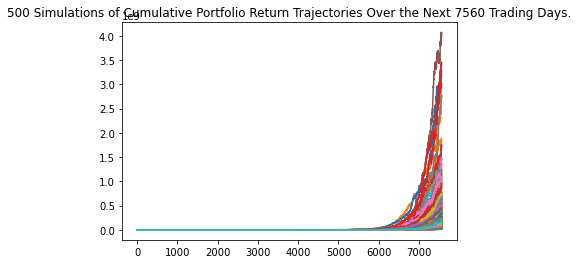

In [89]:
# Plot simulation outcomes
mc_line_plot = MC_thirty_year.plot_simulation()

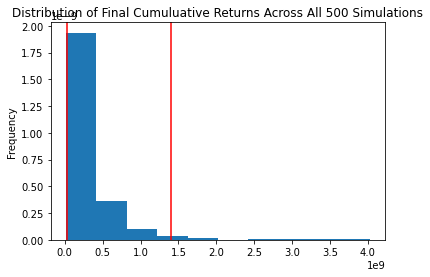

In [90]:
# Plot probability distribution and confidence intervals
mc_dist_plot = MC_thirty_year.plot_distribution()

### Retirement Analysis

In [122]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats = MC_thirty_year.summarize_cumulative_return()

#Print summary statistics
df_summary = summary_stats.to_frame()
#print(summary_stats.mean())

#print('Count: ', round(float(summary_stats.count), 2))
print(summary_stats)
#print("Count:" + str(round(summary_stats[0],2)))
#print("Mean:" + str(round(summary_stats[1],2)))


count           5.000000e+02
mean            3.185790e+08
std             4.413579e+08
min             1.335549e+07
25%             9.393544e+07
50%             1.764722e+08
75%             3.637764e+08
max             4.031450e+09
95% CI Lower    2.285109e+07
95% CI Upper    1.396010e+09
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [133]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000


ci_lower = round(summary_stats[8]*initial_investment,2)
ci_upper = round(summary_stats[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $457021759863.18 and $27920203319395.81


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [134]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summary_stats[8]*initial_investment,2)
ci_upper = round(summary_stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $685532639794.77 and $41880304979093.71


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [127]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns

MC_five_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],   #AGG has 40% weightage and SPY has 60% weightage
    num_simulation = 500,
    num_trading_days = 252*5  #252 is the total number of trading days in one year
)

In [128]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year.portfolio_data.head()

AGG                                        \
                             open      high       low   close    volume   
time                                                                      
2020-03-18 00:00:00-04:00  109.36  110.5700  105.7707  106.33  30173684   
2020-03-19 00:00:00-04:00  106.47  109.2200  105.5600  108.97  21031320   
2020-03-20 00:00:00-04:00  108.46  110.2399  108.4600  109.49  28449412   
2020-03-23 00:00:00-04:00  109.90  112.9400  109.0000  112.55  23873510   
2020-03-24 00:00:00-04:00  111.52  113.5000  111.0754  113.29  18141498   

                                           SPY                            \
                          daily_return    open      high     low   close   
time                                                                       
2020-03-18 00:00:00-04:00          NaN  236.25  248.3700  228.02  241.01   
2020-03-19 00:00:00-04:00     0.024828  239.25  247.3800  232.22  241.18   
2020-03-20 00:00:00-04:00     0.004772  242.53  244.4700  228.50  228.94   
2020-03-23 00:00:00-04:00     0.027948  228.19  229.6833  218.26  222.51   
2020-03-24 00:00:00-04:00     0.006575  234.42  244.1000  233.80  243.59   

                                                   
                              volume daily_return  
time                                               
2020-03-18 00:00:00-04:00  256921808          NaN  
2020-03-19 00:00:00-04:00  248430643     0.000705  
2020-03-20 00:00:00-04:00  286308782    -0.050750  
2020-03-23 00:00:00-04:00  268298876    -0.028086  
2020-03-24 00:00:00-04:00  203576470     0.094737

In [129]:
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.989584,1.018908,0.983558,0.988084,0.984916,1.021593,1.002250,0.989317,0.962840,1.032200,...,0.996180,1.011636,1.014007,1.020984,1.004821,1.026292,1.007596,1.020972,1.016920,0.980726
2,1.004231,1.013363,0.997041,0.995854,0.990283,1.005046,0.982224,0.998730,0.963237,1.023816,...,0.987705,1.012125,1.030923,1.020515,0.989276,1.016590,0.999048,1.046769,1.006789,0.992871
3,1.018159,1.005414,0.993324,1.006559,0.978635,1.005960,0.974919,1.007631,0.971383,1.031698,...,1.002761,1.006770,1.040366,1.014162,0.974645,1.009627,1.015619,1.057537,1.017876,0.996636
4,1.019698,1.001192,0.993729,1.012014,0.992241,1.006012,0.971635,1.023459,0.966063,1.033882,...,0.994575,1.004102,1.044471,1.025859,0.959483,1.026693,1.043223,1.068959,1.022805,1.010179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,15.571329,19.518058,41.570791,25.681198,10.657482,24.269941,24.358007,12.550907,14.879906,52.886353,...,30.407322,35.977261,36.406559,32.316750,16.864986,16.245523,16.869530,27.134990,23.940993,8.528502
1257,15.624988,19.938964,41.822840,25.236232,10.764230,24.486565,24.012157,12.448674,14.401004,52.428335,...,30.247429,36.564504,37.027398,31.986924,16.998189,16.369260,17.200527,26.861047,24.458137,8.763162
1258,15.767487,19.933094,40.459188,25.700646,10.900040,24.146429,23.882148,12.215252,14.412821,53.061257,...,30.752900,36.529401,36.794624,31.801818,16.911770,16.487803,17.063353,26.776729,25.055842,8.564044
1259,15.715549,20.031675,41.139044,25.530904,10.902635,23.877615,23.567587,12.314041,14.570452,52.657650,...,31.138760,36.109511,36.626426,31.782043,17.115786,16.148763,17.223665,26.410817,24.591070,8.788368


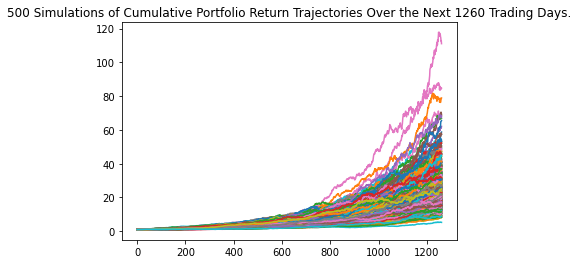

In [130]:
# Plot simulation outcomes
mc_line_plot = MC_five_year.plot_simulation()

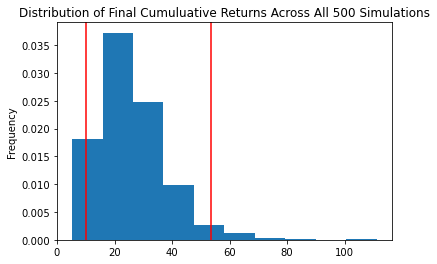

In [131]:
# Plot probability distribution and confidence intervals
mc_dist_plot = MC_five_year.plot_distribution()

In [132]:
# Fetch summary statistics from the Monte Carlo simulation results
five_summary_stats = MC_five_year.summarize_cumulative_return()

#Print summary statistics
#df_summary_five = five_summary_stats.to_frame()
#print(df_summary_five.mean())

#print('Count: ', round(float(summary_stats.count), 2))
print(five_summary_stats)

count           500.000000
mean             26.150630
std              12.227395
min               5.252102
25%              17.410665
50%              24.046753
75%              32.355584
max             111.052691
95% CI Lower     10.002044
95% CI Upper     53.620693
Name: 1260, dtype: float64


In [137]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower = round(summary_stats[8]*initial_investment,2)
ci_upper = round(summary_stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $1371065279589.54 and $83760609958187.42


### Ten Years Retirement Option

In [139]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],   #AGG has 40% weightage and SPY has 60% weightage
    num_simulation = 500,
    num_trading_days = 252*10  #252 is the total number of trading days in one year
)

In [140]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992464,1.000470,1.005825,0.996859,1.011900,1.007662,1.022384,1.002162,0.994202,1.004229,...,1.005743,0.996557,0.987765,1.009687,1.008308,1.007287,0.991092,0.994761,1.010612,0.989159
2,0.998273,1.003485,0.976164,1.004503,1.033685,1.003733,1.020048,0.996340,1.003940,1.011779,...,1.021591,0.978181,0.993059,1.008608,0.995082,0.990830,0.980204,0.986031,1.019937,0.993808
3,1.020502,1.024560,0.981585,1.003268,1.035023,0.997855,1.029306,1.003781,1.004482,1.026667,...,1.009551,0.980103,0.980580,1.017310,1.002723,0.996158,0.997204,0.994510,1.039321,0.994637
4,1.028124,1.033386,1.003537,0.980033,1.031856,1.002402,1.021542,1.008903,0.987872,1.039349,...,1.042308,0.992291,0.987800,1.029737,1.011236,1.001439,0.990689,1.017111,1.025105,0.994649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1089.851082,860.135941,2906.885763,1087.962076,1210.321007,499.053752,387.336292,289.787811,1225.134352,746.469558,...,439.113861,146.141082,274.833472,968.251732,731.456687,1883.080967,321.855760,203.060158,1615.776985,146.192814
2517,1097.032963,855.655828,2905.996712,1104.424647,1210.118181,504.562455,395.908772,281.669986,1235.290797,752.534171,...,435.158653,146.641723,276.441199,982.396281,732.123293,1900.051168,323.032449,202.490586,1615.159532,146.409549
2518,1121.337968,854.750123,2907.211143,1102.670989,1232.654714,503.192602,400.795963,282.938454,1263.212682,754.511971,...,432.400342,145.451781,277.503346,999.009821,725.681829,1922.333297,318.809371,207.747674,1619.682122,143.455173
2519,1117.527343,849.044627,2966.964080,1113.042809,1258.870859,512.537633,404.898732,287.645136,1291.369631,745.670469,...,432.247072,146.725930,281.076193,1005.066547,719.771530,1903.632418,324.212956,211.670802,1631.411360,144.099605


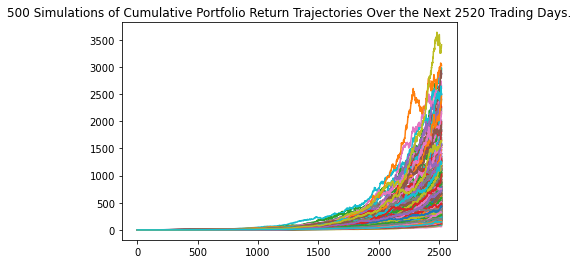

In [141]:
# Plot simulation outcomes
mc_line_plot = MC_ten_year.plot_simulation()

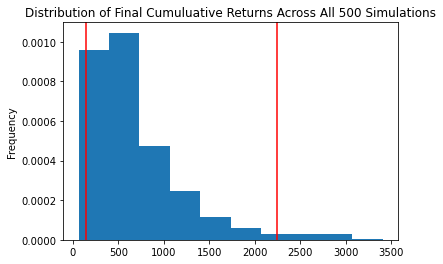

In [142]:
# Plot probability distribution and confidence intervals
mc_dist_plot = MC_ten_year.plot_distribution()

In [143]:
# Fetch summary statistics from the Monte Carlo simulation results
ten_summary_stats = MC_ten_year.summarize_cumulative_return()

# Print summary statistics
print(ten_summary_stats)

count            500.000000
mean             692.974133
std              529.189209
min               62.198736
25%              342.552764
50%              542.294478
75%              863.561761
max             3409.532003
95% CI Lower     140.727453
95% CI Upper    2249.065888
Name: 2520, dtype: float64


In [35]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(summary_stats[8]*initial_investment,2)
ci_upper_ten = round(summary_stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 30 years will end within in the range of $64982.9 and $119425.0
